# Analise exploratória de Dados

É uma abordagem à análise de conjuntos de dados de modo a resumir suas características principais. A Análise Exploratória de Dados ou EDA (Exploratory Data Analysis) consiste em analisar bases de dados e extrair informações úteis dos dados através de técnicas de visualizações e estatísticas .


In [153]:
import pandas as pd

#Bibliotecas Matemáticas
import numpy as np
from scipy import stats

#Bibliotecas Gráficas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [154]:
! pip install seaborn

In [155]:
data= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')


# Análise Estatística Descritiva

Vamos primeiro dar uma olhada nas variáveis ​​utilizando um método de descrição.

A função de descrição calcula automaticamente as estatísticas básicas para todas as variáveis ​​contínuas. Quaisquer valores de NaN são automaticamente ignorados nessas estatísticas.

Isso mostrará:

* a contagem dessa variável
* O significativo
* o desvio padrão (std)
* o valor mínimo
* o IQR (intervalo interquartil: 25%, 50% e 75%)
* o valor máximo

Podemos aplicar o método <code>.describe()</code> da seguinte maneira:

In [156]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


A configuração padrão de <code>.describe()</code> ignora variáveis ​​do tipo objeto. Podemos aplicar o método <code>.describe(include=object)</code> nas variáveis ​​do tipo 'object' da seguinte maneira:

In [157]:
data.describe(include=object)

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


# Correlação

Em probabilidade e estatística, correlação, dependência ou associação é qualquer relação estatística entre duas variáveis que envolva dependência. 

Por exemplo, podemos calcular a correlação entre variáveis ​​do tipo "int64" ou "float64" usando o método "corr":

In [158]:
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


# Variáveis Númericas Contínuas

São variáveis que podem conter qualquer valor dentro de algum intervalo.Para melhor visualização usa-se gráficos de dispersão com linhas ajustadas.

Relação linear positiva

Indica que as duas variáveis se movem juntas, e a relação é fica mais forte, pois a correlação se aproxima de 1.

Vamos encontrar o gráfico de dispersão de "engine-size" e "price".

OBS: Podemos fazer isso usando "regplot", que plota o gráfico de dispersão mais a linha de regressão ajustada para os dados.



(0.0, 53525.934503724246)

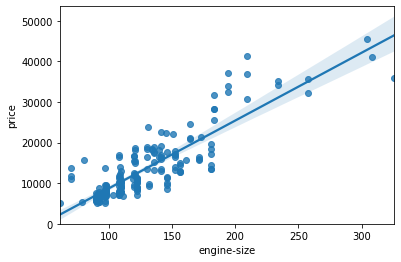

In [159]:
sns.regplot(x="engine-size", y="price", data=data)
plt.ylim(0,)

À medida que o tamanho do motor aumenta, o preço aumenta: isso indica uma correlação direta positiva entre essas duas variáveis. O tamanho do mecanismo parece um bom preditor(utilizada para explicar a variação na variavel dependente) de preço, já que a linha de regressão(Avalia a amplitude dad variação em uma variável, decorrente da variação  em outra variável, ou seja ,prever comportamentos com base na associação entre duas variáveis que geralmente possuem uma boa correlação) é quase uma linha diagonal perfeita.

Podemos examinar a correlação entre "engine-size" e "price". e ver se é aproximadamente 0,87

In [160]:
data[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


O highway-mpg é uma variável preditora potencial de price

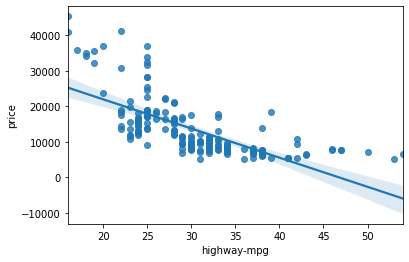

In [161]:
sns.regplot(x="highway-mpg", y="price", data=data)

À medida que a highway-mpg aumenta, o price diminui: isso indica uma relação inversa ou negativa indicando que  as duas variáveis movem-se em direções opostas, e que a relação também fica mais forte quanto mais se próxima de -1. O highway-mpg pode ser um preditor de preço.

Podemos examinar a correlação entre 'highway-mpg' e 'price' e ver que é aproximadamente -0,704

In [162]:
data[["highway-mpg","price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


Vamos ver se "peak-rpm" é uma variável preditora de "preço".

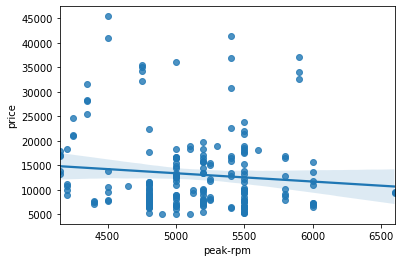

In [163]:
sns.regplot(x="peak-rpm", y="price", data=data)

O peak-rpm não parece ser um bom indicador do price, uma vez que a linha de regressão está próxima da horizontal se aproximando de 0. Além disso, os pontos de dados são muito dispersos e distantes da linha ajustada, mostrando muita variabilidade. Portanto, não é uma variável confiável.

Podemos examinar a correlação entre 'peak-rpm' e 'price' e ver se é aproximadamente -0,101616

In [164]:
data[["peak-rpm","price"]].corr()


,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


# Variáveis Categóricas 

São variáveis que descrevem uma característica de uma unidade de dados e são selecionadas em pequeno grupo categórias.
Para melhor visualização utiliza-se boxPlots. Através desse gráfico podemos identificar outliers(valores discrepantes) e também ver a distribuição e assimetria dos dados. Comparando entre grupos.

### Gráfico boxPlot

É um gráfico utilizado para avaliar a distribuição empírica do dados. O boxplot é formado pelo primeiro e terceiro quartil e pela mediana. 

Quartis (Q1, Q2 e Q3): São valores dados a partir do conjunto de observações ordenado em ordem crescente, que dividem a distribuição em quatro partes iguais. O primeiro quartil, Q1, é o número que deixa 25% das observações abaixo e 75% acima, enquanto que o terceiro quartil, Q3, deixa 75% das observações abaixo e 25% acima. Já Q2 é a mediana, deixa 50% das observações abaixo e 50% das observações acima.

As hastes inferiores e superiores se estendem, respectivamente, do quartil inferior até o menor valor não inferior ao limite inferior e do quartil superior até o maior valor não superior ao limite superior. Os limites são calculados da forma abaixo

Limite inferior: $Q_1-1,5*(Q_3-Q_1) $.

Limite superior: $Q_3+1,5*(Q_3-Q_1) $.


![alt text](http://www.portalaction.com.br/sites/default/files/resize/EstatisticaBasica/figuras/boxplot1-700x354.png)

Vejamos a relação entre "body-style" e "price".

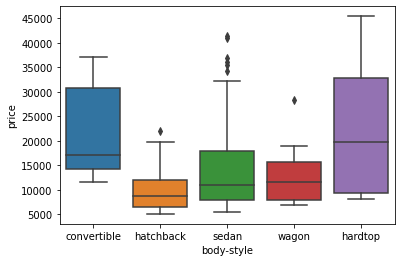

In [165]:
sns.boxplot(x="body-style", y="price", data=data)

Vemos que as distribuições de price entre as diferentes categorias de body-style têm uma sobreposição significativa e, portanto, o body-style não seria um bom preditor de price.

Vamos examinar o mecanismo "engine-location" e "price":

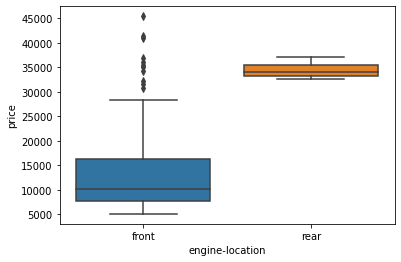

In [166]:
sns.boxplot(x="engine-location", y="price", data=data)

Aqui vemos que a distribuição do price entre essas duas categorias de engine-location, dianteira e traseira, é distinta o suficiente para considerar a engine-location como um bom preditor potencial de price.

Vamos examinar "drive-wheels" e "price".

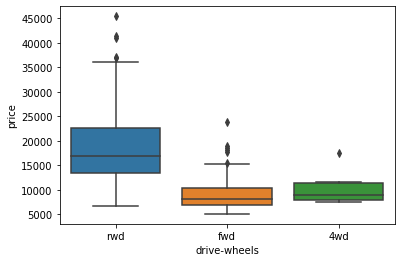

In [167]:
sns.boxplot(x="drive-wheels", y="price", data=data)

Aqui vemos que a distribuição do price entre as diferentes categorias de drive-wheels difere; como tais drive-wheels poderiam ser um preditor de price.

# Contagem de valores

A contagem de valores é uma boa maneira de entender quantas unidades de cada característica temos. Podemos aplicar o método <code>.values_counts()</code> na coluna 'rodas motrizes'. Não esqueça que o método <code>.values_counts()</code> funciona apenas na série Pandas, não nos Dataframes do Pandas. Como resultado, incluímos apenas um suporte "data ['drive-wheels']" e não dois colchetes "data [['drive-wheels']]".

In [168]:
data['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Podemos converter a série em um Dataframe da seguinte maneira e posteriormente  salvar os resultados no quadro de dados "drive_wheels_counts" e renomeie a coluna 'drive-wheels' para 'value_counts'

In [169]:
drive_wheels_counts = data['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)


#Agora vamos renomear o índice para 'drive-wheels':
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Podemos repetir o processo acima para a variável 'engine-location'.

In [170]:
engine_loc_counts = data['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head()

,value_counts
engine-location,
front,198
rear,3


Examinar as contagens de valor da engine-location não seria uma boa variável preditora para o price. Isso ocorre porque só temos 3 carros com motor traseiro e 198 com motor à frente; esse resultado é distorcido. Portanto, não podemos tirar conclusões sobre engine-location.

# Noções Básicas de Agrupamento



Utilizando o método <code>.groupBy()</code>para agrupar dados por diferentes categorias. O agrupamento pode ser feito a partir de uma variável ou várias variáveis e a análise é realizada nos grupos individuais.





Verificando quais os tipos de drive-wheels:

In [171]:
data['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Se quisermos saber, em média, que tipo de drive-wheels é mais valiosa, podemos agrupar "drive-wheels" e depois calculá-las.

Podemos selecionar as colunas 'drive-wheels', 'body-style' e 'price'' e atribuí-las à variável "data_group.

In [172]:
data_group = data[[ 'drive-wheels', 'body-style','price']]

Podemos então calcular o preço médio para cada uma das diferentes categorias de dados.

In [173]:
data_group = data_group.groupby(['drive-wheels'], as_index =False).mean()

In [174]:
data_group

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


Podemos agrupar com várias variáveis. 
Por exemplo, vamos agrupar por 'drive-wheels e 'body-style'. Isso agrupa o quadro de dados pelas combinações exclusivas 'drive-wheels' e 'body-style'. Podemos armazenar os resultados na variável 'group_test'.

In [175]:
test = data[['drive-wheels','body-style','price']]
group_test = test.groupby(['drive-wheels','body-style'],as_index=False).mean()
group_test

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Esses dados agrupados são muito mais fáceis de visualizar quando são transformados em uma tabela dinâmica. Uma tabela dinâmica é como uma planilha do Excel, com uma variável na coluna e outra na linha. Podemos converter o quadro de dados em uma tabela dinâmica usando o método <code>.pivot()</code> para criar uma tabela dinâmica a partir dos grupos.

Nesse caso, deixaremos a variável roda motriz como as linhas da tabela e giraremos o estilo do corpo para se tornar as colunas da tabela:

In [176]:
group_pivot = group_test.pivot(index='drive-wheels',columns='body-style')
group_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

Geralmente, não temos dados para algumas das células dinâmicas. Podemos preencher essas células ausentes com o valor 0, mas qualquer outro valor também pode ser potencialmente usado. Deve-se mencionar que a falta de dados é um assunto bastante complexo e é um curso completo por si só.

In [177]:
group_pivot = group_pivot.fillna(0) 
group_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

### Variáveis: Drive Wheels e Body Style vs Price


Vamos usar um mapa de calor para visualizar a relação :


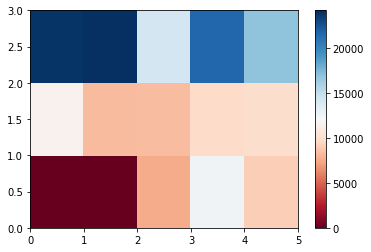

In [178]:
plt.pcolor(group_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

O mapa de calor representa a variável de destino (price) proporcional à cor em relação às variáveis ​​'drive-wheels' e 'body-style' nos eixos vertical e horizontal, respectivamente. Isso nos permite visualizar como o preço está relacionado a 'drive-wheels' e 'body-style'.

Os rótulos padrão não transmitem informações úteis para nós. Vamos mudar isso:

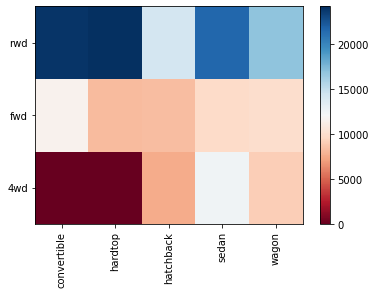

In [179]:
fig, ax = plt.subplots()
im = ax.pcolor(group_pivot, cmap='RdBu')


row_labels = group_pivot.columns.levels[1]
col_labels = group_pivot.index

ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor=False)


ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)


plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()


A visualização é muito importante na ciência de dados, e os pacotes de visualização do Python oferecem grande liberdade. 

A principal questão que queremos responder neste módulo é: "Quais são as principais características que têm maior impacto no preço do carro?".

Para obter uma melhor medida das características importantes, observamos a correlação dessas variáveis ​​com o preço do carro, ou seja: como o preço do carro depende dessa variável?

# Correlação e Causação

Causação: a relação entre causa e efeito entre duas variáveis.
Correlação: Uma medida da extensão da independência entre variáveis.

É importante saber a diferença entre esses dois e que a correlação não implica causalidade. Determinar a correlação é muito mais simples, a causa determinante, pois a causa pode exigir experimentação independente.

## Correlação de Pearson

A Correlação de Pearson mede a dependência linear entre duas variáveis ​​X e Y.


O coeficiente resultante é um valor entre -1 e 1 inclusive, em que:

* 1 : Correlação linear positiva total.
* 0 : Sem correlação linear, as duas variáveis ​​provavelmente não se afetam.
* -1 : correlação linear negativa total.

Correlação de Pearson é o método padrão da função <code>.corr()</code>.


In [180]:
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


O valor p indica aproximadamente a probabilidade de um sistema não correlacionado produzir conjuntos de dados que tenham uma correlação de Pearson pelo menos tão extrema quanto a calculada a partir desses conjuntos de dados.

Podemos obter essas informações usando o módulo "stats" na biblioteca "scipy".

### Wheel-base vs Price

Vamos calcular o coeficiente de correlação de Pearson e o valor P de 'wheel-base' e 'price'.

In [181]:
pearson_coef, p_value = stats.pearsonr(data['wheel-base'], data['price'])
print("O Coeficiente de Correlação de Pearson é", pearson_coef, " com o valor de P = ", p_value)  

O Coeficiente de Correlação de Pearson é 0.584641822265508  com o valor de P =  8.076488270733218e-20


Como o valor p é  <  0,001, a correlação entre a base da roda e o preço é estatisticamente significativa, embora a relação linear não seja extremamente forte (~ 0,585)

### Horsepower vs Price

Vamos calcular o coeficiente de correlação de Pearson e o valor P de 'Horsepower' e 'price'.

In [182]:
pearson_coef, p_value = stats.pearsonr(data['horsepower'], data['price'])
print("O Coeficiente de Correlação de Pearson é", pearson_coef, " com o valor de P = ", p_value)  

O Coeficiente de Correlação de Pearson é 0.8095745670036559  com o valor de P =  6.369057428260101e-48


Como o valor p é  <  0,001, a correlação entre Horsepower vs Price é estatisticamente significativa e a relação linear é bastante forte (~ 0,809, próximo a 1)

## Cálculo da correlação de algumas variáveis:

### Length vs Price

In [183]:
pearson_coef, p_value = stats.pearsonr(data['length'], data['price'])
print("O Coeficiente de Correlação de Pearson é", pearson_coef, " com o valor de P = ", p_value)

O Coeficiente de Correlação de Pearson é 0.6906283804483638  com o valor de P =  8.016477466159556e-30


### Width vs Price



In [184]:
pearson_coef, p_value = stats.pearsonr(data['width'], data['price'])
print("O Coeficiente de Correlação de Pearson é", pearson_coef, " com o valor de P = ", p_value)

O Coeficiente de Correlação de Pearson é 0.7512653440522673  com o valor de P =  9.200335510481646e-38


### Curb-weight vs Price

In [185]:
pearson_coef, p_value = stats.pearsonr(data['curb-weight'], data['price'])
print("O Coeficiente de Correlação de Pearson é", pearson_coef, " com o valor de P = ", p_value)

O Coeficiente de Correlação de Pearson é 0.8344145257702843  com o valor de P =  2.189577238894065e-53


### Engine-size vs Price

In [186]:
pearson_coef, p_value = stats.pearsonr(data['engine-size'], data['price'])
print("O Coeficiente de Correlação de Pearson é", pearson_coef, " com o valor de P = ", p_value)

O Coeficiente de Correlação de Pearson é 0.8723351674455185  com o valor de P =  9.265491622198389e-64


### Bore vs Price

In [187]:
pearson_coef, p_value = stats.pearsonr(data['bore'], data['price'])
print("O Coeficiente de Correlação de Pearson é", pearson_coef, " com o valor de P = ", p_value)

O Coeficiente de Correlação de Pearson é 0.5431553832626602  com o valor de P =  8.049189483935489e-17


### City-mpg vs Price

In [188]:
pearson_coef, p_value = stats.pearsonr(data['city-mpg'], data['price'])
print("O Coeficiente de Correlação de Pearson é", pearson_coef, " com o valor de P = ", p_value)

O Coeficiente de Correlação de Pearson é -0.6865710067844678  com o valor de P =  2.321132065567641e-29


### Highway-mpg vs Price


In [189]:
pearson_coef, p_value = stats.pearsonr(data['highway-mpg'], data['price'])
print("O Coeficiente de Correlação de Pearson é", pearson_coef, " com o valor de P = ", p_value)

O Coeficiente de Correlação de Pearson é -0.704692265058953  com o valor de P =  1.7495471144476358e-31


# ANOVA 

A Análise de Variância (ANOVA) é um método estatístico usado para testar se há diferenças significativas entre as médias de dois ou mais grupos. ANOVA retorna dois parâmetros:

* **Pontuação no teste F** : a ANOVA assume que as médias de todos os grupos são iguais, calcula quanto as médias reais se desviam da suposição e a reporta como a pontuação do teste F. Uma pontuação maior significa que há uma diferença maior entre as médias.

* **Valor -P**: o valor -P indica quão estatisticamente significativo é o nosso valor calculado da pontuação.

Se nossa variável de preço estiver fortemente correlacionada com a variável que estamos analisando, espere que a ANOVA retorne uma pontuação considerável no teste F e um pequeno valor p.


## Drive-Wheels
Como a ANOVA analisa a diferença entre diferentes grupos da mesma variável, a função groupby será útil. Como o algoritmo ANOVA calcula a média dos dados automaticamente, não precisamos calcular a média antecipadamente.

Vamos ver se diferentes tipos de 'drive-wheels' impactam 'price', agrupamos os dados.

Vamos ver se diferentes tipos de 'drive-wheels' impactam 'price', agrupamos os dados.

In [190]:
teste=data[['drive-wheels', 'price']].groupby(['drive-wheels'])

podemos utilizar a função 'f_oneway' nos 'estatísticas' do módulo para obter a pontuação teste F e P-valor .

In [191]:
# ANOVA
f_valor, p_valor = stats.f_oneway(teste.get_group('fwd')['price'], teste.get_group('rwd')['price'],teste.get_group('4wd')['price'])  
print( "ANOVA results: F=", f_valor, ", P =", p_valor)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


Esse é um ótimo resultado, com uma grande pontuação no teste F mostrando uma forte correlação e um valor de P quase 0, implicando quase certa significância estatística. Mas isso significa que todos os três grupos testados estão altamente correlacionados? Vamos, verificar individualmente cada grupo.

###  fwd e rwd

In [192]:
f_valor, p_valor = stats.f_oneway(teste.get_group('fwd')['price'], teste.get_group('rwd')['price'])  
print( "ANOVA resultado: F=", f_valor, ", P =", p_valor )

ANOVA resultado: F= 130.5533160959111 , P = 2.2355306355677845e-23


### 4wd e rwd

In [193]:
f_valor, p_valor = stats.f_oneway(teste.get_group('4wd')['price'], teste.get_group('rwd')['price'])     
print( "ANOVA resultado: F=", f_valor, ", P =", p_valor)  

ANOVA resultado: F= 8.580681368924756 , P = 0.004411492211225333


## 4wd e fwd

In [194]:
f_valor, p_valor = stats.f_oneway(teste.get_group('4wd')['price'], teste.get_group('fwd')['price'])  
print("ANOVA resultado: F=", f_valor, ", P =", p_valor)

ANOVA resultado: F= 0.665465750252303 , P = 0.41620116697845666


# Conclusão 
Variáveis ​​Importantes

Agora, temos uma idéia melhor da aparência de nossos dados e de quais variáveis ​​são importantes a serem levadas em consideração ao prever o preço do carro. Nós o reduzimos às seguintes variáveis:

Variáveis ​​numéricas contínuas:

- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

Variáveis ​​categóricas:

- Drive-wheels

À medida que passamos a criar modelos de aprendizado de máquina para automatizar nossa análise, alimentar o modelo com variáveis ​​que afetam significativamente nossa variável de destino melhorará o desempenho da previsão do nosso modelo.